Mount da Google Drive

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Imports de libraries

In [7]:
import os
import pandas as pd
import numpy as np
import joblib
import math
import decimal
import matplotlib.pyplot as plt


Definição de Constantes

In [8]:
MAIN_PATH = '/content/drive/MyDrive/'

MAIN_PATH_LEAGUE  = MAIN_PATH + 'Data_Football/Liga_Portugal/'

TOTAL_FUNDS_DEFAULT = 50.0

Invocar notebooks de funções e de constantes

In [9]:
functions_path = MAIN_PATH + 'Colab Notebooks/Bet_Functions.ipynb'

%run '{functions_path}'


Definição de bet size Fazer um form?

In [10]:
odd_bet_limit = 1.2
summary_path = MAIN_PATH_LEAGUE + 'Predicts/Summary_lp_2023_24.csv'
list_derby_teams  = ['SPLISBON', 'BENFICA', 'PORTO','SPBRAGA']

Get proxima jornada e total funds

In [11]:
dfSummary=pd.read_csv(summary_path)

dfLastWeek = dfSummary.iloc[-1:]


jornada = int(dfSummary.iloc[-1:]['game_week'] + 1)

total_funds_previousweek = float(dfSummary.iloc[-1:]['total_funds_final'])


if total_funds_previousweek != 0:
    total_funds = total_funds_previousweek
else:
    total_funds = TOTAL_FUNDS_DEFAULT

# Calculo bet_size = 5% da dezena anterior do total_funds
# (ex: para total_funds 63,3 --> dezena anterior = 60 -->  Bet_Size = 0,05*60 = 3.0 )
bet_size = 0.05*(total_funds - (total_funds % 10))

print(jornada)
print(total_funds)
print(bet_size)


18
61.78
3.0


Extração do ficheiro clean

In [12]:

df=pd.read_csv(MAIN_PATH_LEAGUE + 'Raw/Liga_Portugal_2023_24.csv')
df_clean=df[["HomeTeam",	"AwayTeam",	"FTHG",	"FTAG",	"FTR",	"HTHG",	"HTAG",	"HTR",	"HS",	"AS",	"HST",	"AST",	"HF",	"AF",	"HC",	"AC",'BWH','BWD','BWA']].copy()
df

,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,AvgC<2.5,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA
0,P1,11/8/2023,20:15,Sp Braga,Famalicao,1.0,2.0,A,1.0,0.0,...,2.24,-1.25,2.08,1.73,2.18,1.75,2.23,1.90,2.07,1.78
1,P1,12/8/2023,15:30,Gil Vicente,Portimonense,5.0,0.0,H,2.0,0.0,...,1.90,-0.50,1.87,2.03,1.86,2.05,1.88,2.06,1.83,2.01
2,P1,12/8/2023,18:00,Farense,Casa Pia,0.0,3.0,A,0.0,1.0,...,1.55,-0.25,2.17,1.75,2.19,1.75,2.20,1.83,2.07,1.77
3,P1,12/8/2023,20:30,Sp Lisbon,Vizela,3.0,2.0,H,2.0,0.0,...,2.37,-1.75,1.87,2.03,1.85,2.05,1.88,2.12,1.81,2.04
4,P1,13/08/2023,15:30,Rio Ave,Chaves,2.0,0.0,H,0.0,0.0,...,1.70,-0.50,1.92,1.98,1.93,1.97,1.95,2.01,1.90,1.93
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157,NaN,NaN,NaN,Casa Pia,Farense,NaN,NaN,N,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
158,NaN,NaN,NaN,Porto,Moreirense,NaN,NaN,N,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
159,NaN,NaN,NaN,Portimonense,Gil Vicente,NaN,NaN,N,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
160,NaN,NaN,NaN,Chaves,Rio Ave,NaN,NaN,N,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Limpar nomes dos clubes -Upper Case e limpar espaços

In [13]:
df_clean.loc[:, ['HomeTeam']] = df_clean["HomeTeam"].apply(str.upper).apply(lambda x: x.replace(' ', ''))
df_clean.loc[:, ['AwayTeam']] = df_clean["AwayTeam"].apply(str.upper).apply(lambda x: x.replace(' ', ''))

Copiar ficheiro final para a directoria clean

In [14]:
df_clean.to_csv(MAIN_PATH_LEAGUE + 'Clean/Liga_Portugal_2023_24_clean.csv')
df_clean.head(5)

,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,HS,AS,HST,AST,HF,AF,HC,AC,BWH,BWD,BWA
0,SPBRAGA,FAMALICAO,1.0,2.0,A,1.0,0.0,H,13.0,12.0,2.0,4.0,17.0,12.0,3.0,4.0,1.44,4.50,6.50
1,GILVICENTE,PORTIMONENSE,5.0,0.0,H,2.0,0.0,H,8.0,9.0,5.0,3.0,11.0,14.0,1.0,1.0,2.00,3.30,3.60
2,FARENSE,CASAPIA,0.0,3.0,A,0.0,1.0,A,12.0,14.0,5.0,5.0,13.0,13.0,5.0,6.0,2.45,3.00,2.95
3,SPLISBON,VIZELA,3.0,2.0,H,2.0,0.0,H,19.0,10.0,6.0,4.0,16.0,9.0,8.0,3.0,1.18,6.75,16.00
4,RIOAVE,CHAVES,2.0,0.0,H,0.0,0.0,D,21.0,6.0,8.0,1.0,12.0,20.0,14.0,3.0,2.10,3.25,3.50


In [15]:
dl_lp_fix, dl_lp_match_raw= split_data(jornada -1, 9 ,df_clean)

dl_lp_match = dl_lp_match_raw.copy()
dl_lp_match.loc[:, ['HomeTeam']] = dl_lp_match["HomeTeam"].apply(str.upper).apply(lambda x: x.replace(' ', ''))
dl_lp_match.loc[:, ['AwayTeam']] = dl_lp_match["AwayTeam"].apply(str.upper).apply(lambda x: x.replace(' ', ''))
dl_lp_match

,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,HS,AS,HST,AST,HF,AF,HC,AC,BWH,BWD,BWA
153,FAMALICAO,SPBRAGA,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.20,3.80,1.75
154,VIZELA,SPLISBON,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.75,4.80,1.31
155,BENFICA,BOAVISTA,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.13,7.50,15.00
156,ESTORIL,AROUCA,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.45,3.25,2.75
157,CASAPIA,FARENSE,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.25,3.30,3.10
158,PORTO,MOREIRENSE,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.24,5.25,10.00
159,PORTIMONENSE,GILVICENTE,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.50,3.30,2.65
160,CHAVES,RIOAVE,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.80,3.25,2.45
161,GUIMARAES,ESTRELA,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.63,3.75,5.25


In [16]:
all_teams_home = dl_lp_fix.HomeTeam.unique()
all_teams_away = dl_lp_fix.AwayTeam.unique()

all_teams_raw = np.concatenate([all_teams_home, all_teams_away])

all_teams = np.unique(all_teams_raw)

all_teams_stats = []

for team in all_teams:
  team_stats = calc_feats(dl_lp_fix,team)
  all_teams_stats.append(team_stats)

df_all_stats = pd.DataFrame(all_teams_stats)

df_all_stats

,team,shots,shots_ot,shots_vs,shots_ot_vs,points,form
0,AROUCA,213.0,73.0,173.0,75.0,16,7
1,BENFICA,280.0,117.0,167.0,53.0,42,13
2,BOAVISTA,159.0,63.0,239.0,94.0,20,5
3,CASAPIA,165.0,58.0,225.0,87.0,19,6
4,CHAVES,202.0,75.0,219.0,103.0,11,1
5,ESTORIL,198.0,85.0,242.0,91.0,17,7
6,ESTRELA,163.0,51.0,236.0,79.0,18,6
7,FAMALICAO,197.0,61.0,175.0,70.0,22,6
8,FARENSE,189.0,69.0,293.0,98.0,21,5
9,GILVICENTE,173.0,74.0,221.0,85.0,16,5


Apply Model

In [17]:
features = df_all_stats[['shots','shots_ot','shots_vs','shots_ot_vs']]
model = joblib.load(MAIN_PATH_LEAGUE+ 'Model/lp_model.joblib')

df_all_stats['exp_points'] = model.predict(features)

df_all_stats.sort_values('exp_points', ascending=[False])



,team,shots,shots_ot,shots_vs,shots_ot_vs,points,form,exp_points
1,BENFICA,280.0,117.0,167.0,53.0,42,13,40.998144
16,SPLISBON,244.0,104.0,134.0,47.0,43,12,35.004092
13,PORTO,234.0,90.0,147.0,44.0,38,10,33.731176
15,SPBRAGA,268.0,104.0,177.0,70.0,33,7,32.519293
10,GUIMARAES,208.0,70.0,168.0,61.0,33,11,23.347837
17,VIZELA,207.0,76.0,211.0,74.0,13,3,22.307525
11,MOREIRENSE,193.0,64.0,186.0,66.0,29,8,20.182214
0,AROUCA,213.0,73.0,173.0,75.0,16,7,19.815393
5,ESTORIL,198.0,85.0,242.0,91.0,17,7,18.627981
7,FAMALICAO,197.0,61.0,175.0,70.0,22,6,18.132778


Value Betting
Prever resultados da jornada

In [18]:
dl_lp_match[['HomeTeam', 'AwayTeam','BWH','BWD','BWA','FTR']]


dl_lp_match

,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,HS,AS,HST,AST,HF,AF,HC,AC,BWH,BWD,BWA
153,FAMALICAO,SPBRAGA,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.20,3.80,1.75
154,VIZELA,SPLISBON,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.75,4.80,1.31
155,BENFICA,BOAVISTA,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.13,7.50,15.00
156,ESTORIL,AROUCA,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.45,3.25,2.75
157,CASAPIA,FARENSE,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.25,3.30,3.10
158,PORTO,MOREIRENSE,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.24,5.25,10.00
159,PORTIMONENSE,GILVICENTE,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.50,3.30,2.65
160,CHAVES,RIOAVE,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.80,3.25,2.45
161,GUIMARAES,ESTRELA,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.63,3.75,5.25


In [19]:
predictions = []

for ind,row in dl_lp_match.iterrows():

  home_team = row['HomeTeam']
  away_team = row['AwayTeam']

  home_exp_points = df_all_stats[
      df_all_stats['team']==home_team]['exp_points'].values[0]
  away_exp_points = df_all_stats[
      df_all_stats['team']==away_team]['exp_points'].values[0]

  derby =  (home_team in list_derby_teams ) & (away_team  in list_derby_teams)
  exp_points_diff_teams = (home_exp_points - away_exp_points)

  if exp_points_diff_teams > 4:
    result = 'H'
    odds = row['BWH']
  elif abs(exp_points_diff_teams) < 4:
     result = 'D'
     odds = row['BWD']
  else:
    result = 'A'
    odds = row['BWA']

  pred = {"HomeTeam" : home_team, "AwayTeam": away_team, "Prediction": result, "Odds":odds, "Derby": derby}

  predictions.append(pred)


Build slip

In [20]:
decimal.getcontext().rounding = decimal.ROUND_HALF_UP


df_slip = pd.DataFrame(predictions)

df_slip = dl_lp_match.merge(df_slip, on = ['HomeTeam', 'AwayTeam'])[['HomeTeam','AwayTeam','Prediction','Derby','Odds','FTR']]



df_slip['BetSize'] = np.where(
     (df_slip['Odds']< odd_bet_limit) | (df_slip['Derby']==True)
     ,0
    ,bet_size
)

df_slip['Win'] = np.where(
     (df_slip['Prediction']==df_slip['FTR']) & (df_slip['BetSize'] > 0)
     ,((df_slip['Odds']-1)*bet_size)
     ,np.where(df_slip['BetSize']==0
               ,0
               ,-1*bet_size)
     )

df_slip

,HomeTeam,AwayTeam,Prediction,Derby,Odds,FTR,BetSize,Win
0,FAMALICAO,SPBRAGA,A,False,1.75,N,3.0,-3.0
1,VIZELA,SPLISBON,A,False,1.31,N,3.0,-3.0
2,BENFICA,BOAVISTA,H,False,1.13,N,0.0,0.0
3,ESTORIL,AROUCA,D,False,3.25,N,3.0,-3.0
4,CASAPIA,FARENSE,A,False,3.10,N,3.0,-3.0
5,PORTO,MOREIRENSE,H,False,1.24,N,3.0,-3.0
6,PORTIMONENSE,GILVICENTE,D,False,3.30,N,3.0,-3.0
7,CHAVES,RIOAVE,D,False,3.25,N,3.0,-3.0
8,GUIMARAES,ESTRELA,H,False,1.63,N,3.0,-3.0


In [21]:
# gera ficheiro slip raw com os valores da jornada
total_win = df_slip['Win'].sum()
total_fundos = total_funds_previousweek + total_win

slip_path = MAIN_PATH_LEAGUE + 'Predicts/slip_jornada_' + str(jornada).rjust(2, "0")

df_slip.to_csv(slip_path + '.csv')
print('total win provisory = ' + str(round(total_win,2)))
print('total fundos provisory = ' + str(round(total_fundos,2)))


total win provisory = -24.0
total fundos provisory = 37.78


Calc sum and append to sumary

In [22]:

# Se ficheiro slip final não existe chamar a função exit do notebook de funções
if os.path.exists(slip_path + '.csv')==False:
  print('Jornada ' + str(jornada) + ' ainda não foi completa.')
  exit()

#lê o slip desta jornada
df_slip=pd.read_csv(slip_path + '.csv')

#retira o array BetSizes e calcula o numero de apostas efectuadas (todas as apostas com BetSize >0)
arrayBetSize = df_slip['BetSize']
number_bets = arrayBetSize.where(arrayBetSize > 0).count()

#retira o array Win e calcula o total de ganhos (suma) e numero de apostas ganhas (valor >0)
arrayWin = round(df_slip['Win'],2)
gameweek_winning = round(arrayWin.sum(),2)
number_winning_bets = arrayWin.where(arrayWin > 0).count()

#Total dos fundos alocados = Soma vo valor de todas apostas efectuadas
total_funds_allocated = df_slip['BetSize'].sum()
#Fundos finais = fundos totais da semana anterior + ganhos desta semana
total_funds_final = total_funds + gameweek_winning

# Retorno sobre o montante apostado
perc_return_on_bet = (0 if total_funds_allocated == 0 else round(100*(gameweek_winning/total_funds_allocated), 2))

# Percentagem de apostas ganhas (numero de apostas ganhas / numero de apostas efectuadaa)
perc_winning_bets = (0 if number_bets == 0 else round(100*(number_winning_bets/number_bets), 2))

# Retorno total  = (Fundos finais nesta semana- fundos iniciais) / fundos iniciais
total_return = round(100*(total_funds_final-TOTAL_FUNDS_DEFAULT)/TOTAL_FUNDS_DEFAULT,2)

#contrução do registo a adicionar ao dataframe
game_week_summary = [{'game_week': jornada,
                      'game_week_winning': gameweek_winning,
                      'bet_size': bet_size,
                      'total_funds_allocated': total_funds_allocated,
                      'total_funds': total_funds,
                      'total_funds_final': total_funds_final,
                      'percent_return_on_bet' : perc_return_on_bet,
                      'percent_total_return': total_return,
                      'number_bets' : number_bets,
                      'number_win_bets': number_winning_bets,
                      'percent_winning_bets': perc_winning_bets}]

df_summary = pd.DataFrame(game_week_summary)

#adidionar registo da jornada ao csv de Sumário
df_summary.to_csv(summary_path, mode='a', header=False, index=False)



Abrir CSV Summary

In [23]:
df_summary_final=pd.read_csv(summary_path)

max_x = df_summary_final.game_week.max() + 1
min_x = 9

#min_x = df_summary_final.game_week.min() -1


max_y = max(df_summary_final.percent_return_on_bet.max(), df_summary_final.percent_total_return.max()) + 20

min_y = min(df_summary_final.percent_return_on_bet.min(), df_summary_final.percent_total_return.min()) - 10
df_summary_final



,game_week,game_week_winning,bet_size,total_funds_allocated,total_funds,total_funds_final,percent_return_on_bet,percent_total_return,number_bets,number_win_bets,percent_winning_bets
0,2,-2.45,1.0,0.0,0.00,0.00,-24.50,0.00,9,2,22.22
1,3,-7.00,1.0,0.0,0.00,0.00,-70.00,0.00,9,3,33.33
2,4,0.95,1.0,0.0,0.00,0.00,9.50,0.00,9,3,33.33
3,5,-1.91,1.0,0.0,0.00,0.00,-19.10,0.00,9,4,44.44
4,6,6.19,1.0,0.0,0.00,0.00,61.90,0.00,9,7,77.78
5,7,-5.86,1.0,0.0,0.00,0.00,-58.60,0.00,9,2,22.22
6,8,2.71,1.0,0.0,0.00,0.00,27.10,0.00,9,6,66.67
7,9,-3.29,1.0,0.0,0.00,0.00,-32.90,0.00,9,3,33.33
8,10,-1.99,1.0,0.0,0.00,0.00,-19.90,0.00,9,4,44.44
9,11,5.80,1.0,0.0,0.00,0.00,58.00,0.00,9,6,66.67


Imprimir grafico

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
summary_path =/content/drive/MyDrive/Data_Football/Liga_Portugal/Predicts/Summary_lp_2023_24.csv


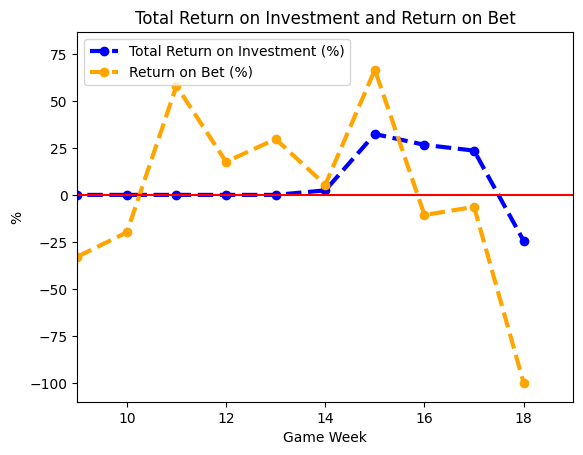

In [24]:
%run '/content/drive/MyDrive/Colab Notebooks/Generic_Graphs.ipynb'